### Movie Popularity Analysis
###### Q: Which movie brand has higher box office sales and ratings over 20 years?

In [1]:
# Dependencies
import pandas as pd
import requests
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
import numpy as np

# CSV file into dataframe  (https://www.statcrunch.com/app/index.php?dataid=1150559)
marvel_movie_list = pd.read_csv(
    'marvel_vs_dc_movies.csv').sort_values(["Release"])

movies = marvel_movie_list["Film"].tolist()  #list used to access OMDB api format

marvel_dc_movie_info = pd.DataFrame(columns=['Company', 'Film', 'Release Year', 'Rated', 'Director', 'BoxOffice',
                                             'Internet Movie Database', 'Rotten Tomatoes', 'Metacritic', 'Metascore',
                                             'imdb', 'imdbVotes'])

url = "http://www.omdbapi.com/?apikey=f39952c&t="

for movie in movies:
    try:  # approx 5 movie title not found in site
        _movie = requests.get(url + movie).json()
        title = _movie['Title']
        year = _movie['Year']
        rated = _movie['Rated']
        director = _movie['Director']
        boxoffice = _movie['BoxOffice']
        int_mov_db = _movie['Ratings'][0]['Value']
        rotten = _movie['Ratings'][1]['Value']
        metacritic = _movie['Ratings'][2]['Value']
        metascore = _movie['Metascore']
        imdb = _movie['imdbRating']
        imdbVotes = _movie['imdbVotes']
        marvel_dc_movie_info = marvel_dc_movie_info.append({'Film': title, 'Release Year': year,
                                                            'Rated': rated, 'Director': director,
                                                            'BoxOffice': boxoffice, 'Internet Movie Database': int_mov_db,
                                                            'Rotten Tomatoes': rotten, 'Metacritic': metacritic, 'Metascore': metascore,
                                                            'imdb': imdb, 'imdbVotes': imdbVotes}, ignore_index=True)
    except Exception:  # Error : "Title"
        pass

marvel_dc_movie_info.sort_values(["Release Year"])

# Merge of original csv and OMDB data
marvel_dc_merged_df = marvel_movie_list.merge(
    marvel_dc_movie_info, on="Film", how='left')
marvel_dc_merged = marvel_dc_merged_df.filter(items=['Company_x', 'Film', 'Release', 'Adjusted', 'Worldwide', 'Domestic',
                                                     'Foreign', 'Rated', 'Director', 'Internet Movie Database', 'Rotten Tomatoes', 'Metacritic', 'Metascore', 'imdb', 'imdbVotes'])

marvel_dc_merged = marvel_dc_merged.rename(columns={"Company_x": "Company"})

marvel_dc_movie_list = marvel_dc_merged.drop_duplicates()

marvel_dc_movie_list.head(70)


# Due to similar and odd title names for movies, some records did not pull OMDB data successfully.
# Exported DF to CSV and manually filled missing ratings data and calculated means to create "omdb_averaged_ratings.csv" for later ratings analysis

,Company,Film,Release,Adjusted,Worldwide,Domestic,Foreign,Rated,Director,Internet Movie Database,Rotten Tomatoes,Metacritic,Metascore,imdb,imdbVotes
0,DC,Batman: The Movie,1966,22.060185,3.000000,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,DC,Superman,1978,1097.039000,300.218018,134.218018,166.000000,PG,Richard Donner,7.3/10,93%,86/100,86,7.3,"136,347"
2,DC,Superman II,1980,312.806365,108.185706,108.185706,NaN,PG,"Richard Lester, Richard Donner",6.8/10,87%,87/100,87,6.8,"83,425"
3,DC,Superman III,1983,143.405983,59.950623,59.950623,NaN,PG,Richard Lester,4.9/10,26%,42/100,42,4.9,"54,725"
4,DC,Supergirl,1984,32.782737,14.296438,14.296438,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Marvel,Howard the Duck,1986,82.524005,37.962774,16.295774,21.667000,PG,Willard Huyck,4.6/10,15%,28/100,28,4.6,"36,364"
6,DC,Superman IV: The Quest for Peace,1987,32.887350,15.681020,15.681020,NaN,PG,Sidney J. Furie,3.7/10,12%,22/100,22,3.7,"36,036"
7,DC,The Return of Swamp Thing,1989,0.370471,0.192816,0.192816,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Marvel,The Punisher,1989,1.024880,0.533411,33.810189,0.533411,R,Jonathan Hensleigh,6.5/10,29%,33/100,33,6.5,"133,725"
10,DC,Batman,1989,790.353880,411.348924,251.188924,160.160000,PG-13,Tim Burton,7.6/10,72%,69/100,69,7.6,"291,045"


# Movie Sales and Rating Charts

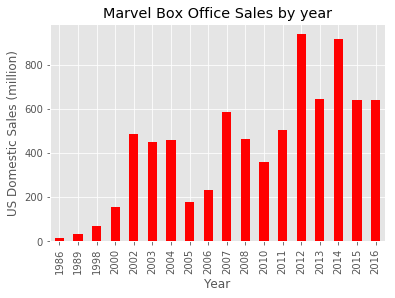

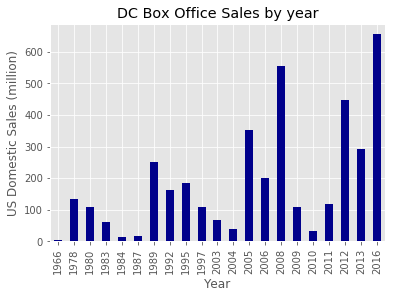

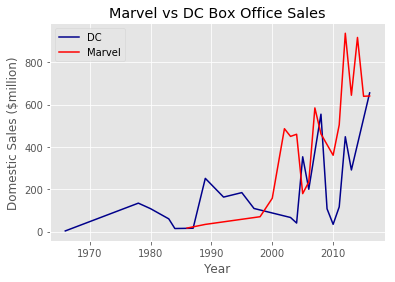

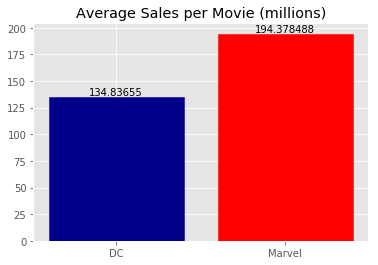

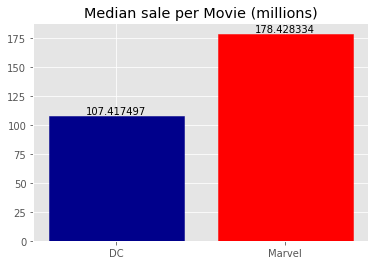

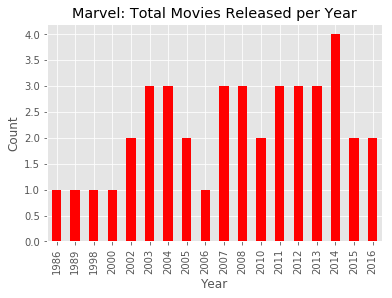

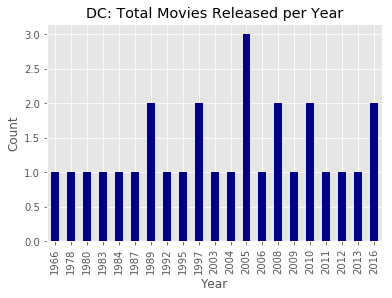

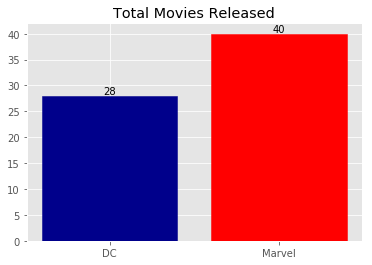

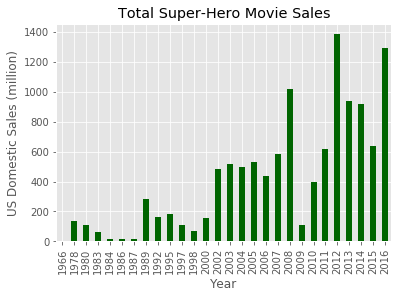

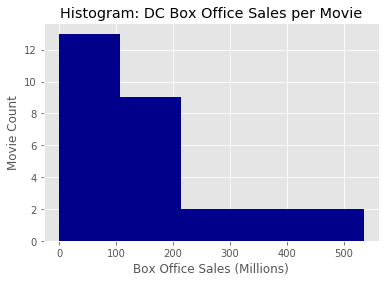

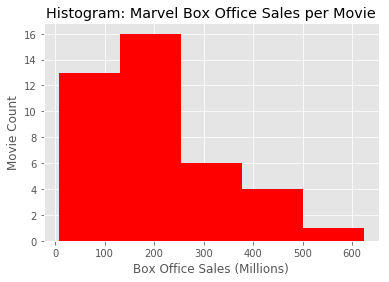

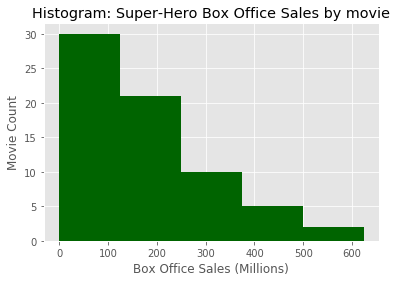

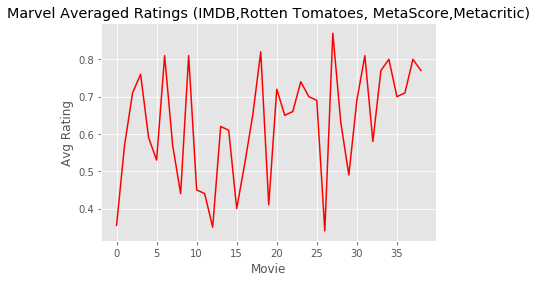

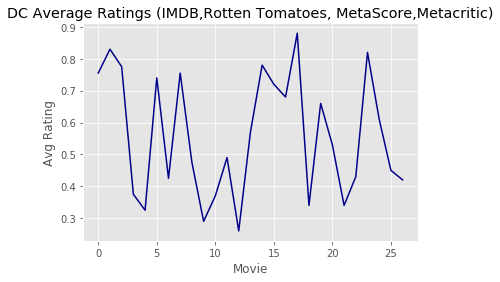

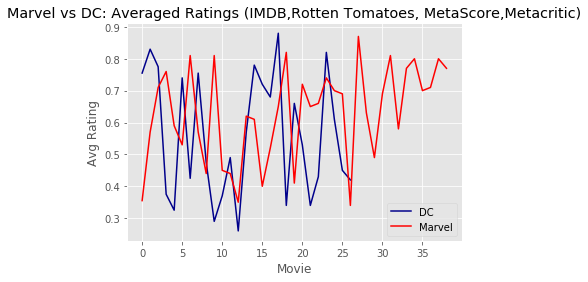

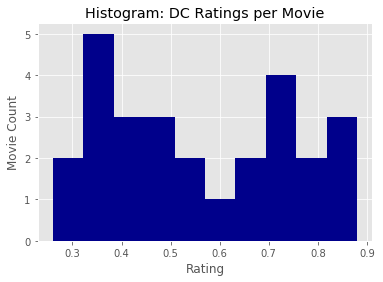

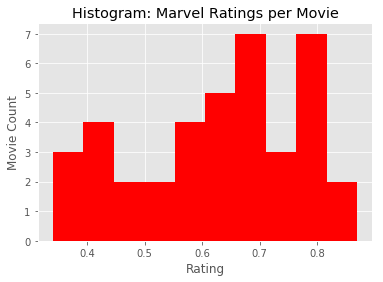

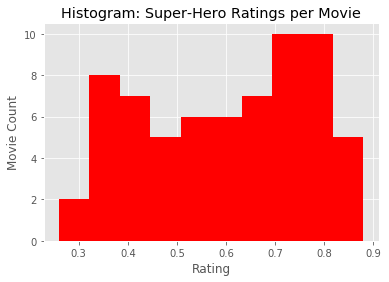

In [2]:
# Data frame of Marvel and DC list of movies
marvel_movies = marvel_dc_movie_list.loc[marvel_dc_movie_list['Company'] == 'Marvel']
marvel_movies = pd.DataFrame(marvel_movies)

dc_movies = marvel_dc_movie_list.loc[marvel_dc_movie_list['Company'] == 'DC']
dc_movies = pd.DataFrame(dc_movies)


# Sales by year

# Marvel movies grouped by year and domestic sales
grouped_marvel_movies = marvel_dc_movie_list.loc[marvel_dc_movie_list['Company'] == 'Marvel'].groupby('Release')[
    'Domestic'].sum()
grouped_marvel_movies = pd.DataFrame(grouped_marvel_movies)
grouped_marvel_movies.head()

# DC grouped by year and domestic sales
grouped_dc_movies = marvel_dc_movie_list.loc[marvel_dc_movie_list['Company'] == 'DC'].groupby(
    'Release')['Domestic'].sum()  # .reset_index(drop =False)
grouped_dc_movies = pd.DataFrame(grouped_dc_movies)
grouped_dc_movies.head()

#Matplotlib bar chart of Sales by year
grouped_marvel_movies["Domestic"].plot(kind='bar', color="red")

plt.title("Marvel Box Office Sales by year")
plt.xlabel("Year")
plt.ylabel("US Domestic Sales (million)")

# Save Figure
plt.savefig("Marvel_Sales.png")

plt.show()


grouped_dc_movies["Domestic"].plot(kind='bar', color="darkblue")

plt.title("DC Box Office Sales by year")
plt.xlabel("Year")
plt.ylabel("US Domestic Sales (million)")

plt.savefig("DC_Sales.png")
plt.show()

grouped_dc_movies["Domestic"].plot(kind='line', color="darkblue", label="DC")
grouped_marvel_movies["Domestic"].plot(
    kind='line', color="red", label="Marvel")

plt.title("Marvel vs DC Box Office Sales")
plt.xlabel("Year")
plt.ylabel("Domestic Sales ($million)")
plt.savefig("Domestic Sales.png")

plt.legend(loc="best")
plt.show()

# Average sales per movie Marvel v DC

marvel_dc_movie_list.groupby('Company')["Domestic"].sum(
)/marvel_dc_movie_list.groupby('Company')["Film"].count()

x_axis = ["DC", "Marvel"]
y_axis = [134.836550, 194.378488]

barlist = plt.bar(x_axis, y_axis, alpha=1, align="center")

barlist[0].set_color('darkblue')
barlist[1].set_color('red')


def autolabel(barlist):
    """
    Attach a text label above each bar displaying its height
    """
    counter = 0
    for rect in barlist.get_children():

        height = rect.get_height()
        plt.text(rect.get_x() + rect.get_width()/2., 1*height, y_axis[counter],
                 ha='center', va='bottom')
        counter += 1


autolabel(barlist)
# avg_sales.plot.bar()

plt.title("Average Sales per Movie (millions)")
plt.savefig("AVG_Sales.png")
plt.show()

marvel_dc_movie_list.groupby('Company')["Domestic"].median()

x_axis = ["DC", "Marvel"]
y_axis = [107.417497, 178.428334]

barlist = plt.bar(x_axis, y_axis, alpha=1, align="center")

barlist[0].set_color('darkblue')
barlist[1].set_color('red')


def autolabel(barlist):
    """
    Attach a text label above each bar displaying its height
    """
    counter = 0
    for rect in barlist.get_children():

        height = rect.get_height()
        plt.text(rect.get_x() + rect.get_width()/2., 1*height, y_axis[counter],
                 ha='center', va='bottom')
        counter += 1


autolabel(barlist)


plt.title("Median sale per Movie (millions)")
plt.savefig("Median_Sales.png")
plt.show()


# Marvel: Number of movies released per Year

marvel_movie_count = marvel_movies.groupby(['Release']).agg({"Film": "size"})

marvel_movie_count = pd.DataFrame(marvel_movie_count)
marvel_movie_count.head()

# DC count of movie releases per year
dc_movies_count = marvel_dc_movie_list.loc[marvel_dc_movie_list['Company'] == 'DC'].groupby(['Release']).agg({"Film": "size"})\

dc_movies_count = pd.DataFrame(dc_movies_count)
dc_movies_count.head()


marvel_movie_count["Film"].plot(kind='bar', color="red")

plt.title("Marvel: Total Movies Released per Year")
plt.xlabel("Year")
plt.ylabel("Count")


# Save Figure
plt.savefig("Marvel_Count.png")

plt.show()

dc_movies_count["Film"].plot(kind='bar', color="darkblue")

plt.title("DC: Total Movies Released per Year")
plt.xlabel("Year")
plt.ylabel("Count")


# Save Figure
plt.savefig("DC_Count.png")

plt.show()

marvel_dc_movie_list.groupby('Company')["Film"].count()

x_axis = ["DC", "Marvel"]
y_axis = [28, 40]

barlist = plt.bar(x_axis, y_axis, alpha=1, align="center")

barlist[0].set_color('darkblue')
barlist[1].set_color('red')


def autolabel(barlist):
    """
    Attach a text label above each bar displaying its height
    """
    counter = 0
    for rect in barlist.get_children():

        height = rect.get_height()
        plt.text(rect.get_x() + rect.get_width()/2., 1*height, y_axis[counter],
                 ha='center', va='bottom')
        counter += 1


autolabel(barlist)


plt.title("Total Movies Released")
plt.savefig("Total_release.png")
plt.show()


# Bar chart Super-Hero Movie sales

# Total sales of all movies Marvel and DC
both_total_sales = marvel_dc_movie_list.groupby('Release')["Domestic"].sum()

both_total_sales.plot(kind='bar', color="darkgreen")

plt.title("Total Super-Hero Movie Sales")
plt.xlabel("Year")
plt.ylabel("US Domestic Sales (million)")

# Save Figure
plt.savefig("Total_sales.png")

plt.show()

#Histogram of Box office sales
dc_movies["Domestic"].hist(bins=5, color="darkblue")
plt.title("Histogram: DC Box Office Sales per Movie")
plt.xlabel("Box Office Sales (Millions)")
plt.ylabel("Movie Count")
plt.savefig("Histogram DC Sales per movie.png")
plt.show()

marvel_movies["Domestic"].hist(bins=5, color="red")
plt.title("Histogram: Marvel Box Office Sales per Movie")
plt.xlabel("Box Office Sales (Millions)")
plt.ylabel("Movie Count")
plt.savefig("Histogram Marvel Sales per movie.png")
plt.show()

marvel_dc_movie_list["Domestic"].hist(bins=5, color="darkgreen")
plt.title("Histogram: Super-Hero Box Office Sales by movie")
plt.xlabel("Box Office Sales (Millions)")
plt.ylabel("Movie Count")
plt.savefig("Histogram_total_Sales.png")
plt.show()

#Data on movie rating
averaged_ratings = pd.read_csv(
    'omdb_averaged_ratings.csv').sort_values(["Release"])
averaged_ratings.head()

marvel_ratings = averaged_ratings.loc[averaged_ratings['Company_x']
                                      == 'Marvel'].reset_index()
marvel_ratings.head()


marvel_ratings["Avg rating"].plot(kind='line', color="red", label="Marvel")
plt.title("Marvel Averaged Ratings (IMDB,Rotten Tomatoes, MetaScore,Metacritic)")
plt.xlabel("Movie")
plt.ylabel("Avg Rating")
plt.savefig("Marvel Rating.png")

plt.show()

dc_ratings = averaged_ratings.loc[averaged_ratings['Company_x'] == 'DC'].reset_index(
)
dc_ratings.head()


dc_ratings["Avg rating"].plot(kind='line', color="darkblue")
plt.title("DC Average Ratings (IMDB,Rotten Tomatoes, MetaScore,Metacritic)")
plt.xlabel("Movie")
plt.ylabel("Avg Rating")
plt.savefig("DC Rating.png")


plt.show()

dc_ratings["Avg rating"].plot(kind='line', color="darkblue", label="DC")
marvel_ratings["Avg rating"].plot(kind='line', color="red", label="Marvel")

plt.title(
    "Marvel vs DC: Averaged Ratings (IMDB,Rotten Tomatoes, MetaScore,Metacritic)")
plt.xlabel("Movie")
plt.ylabel("Avg Rating")
plt.savefig("Marvel v DC Rating.png")

plt.legend(loc="best")
plt.show()

dc_ratings["Avg rating"].hist(bins=10, color="darkblue")
plt.title("Histogram: DC Ratings per Movie")
plt.xlabel("Rating")
plt.ylabel("Movie Count")
plt.savefig("Histogram DC rating per movie.png")
plt.show()

marvel_ratings["Avg rating"].hist(bins=10, color="red")
plt.title("Histogram: Marvel Ratings per Movie")
plt.xlabel("Rating")
plt.ylabel("Movie Count")
plt.savefig("Histogram Marvel rating per movie.png")
plt.show()

averaged_ratings["Avg rating"].hist(bins=10, color="red")
plt.title("Histogram: Super-Hero Ratings per Movie")
plt.xlabel("Rating")
plt.ylabel("Movie Count")
plt.savefig("Histogram Super-Hero rating per movie.png")
plt.show()

# Comic Book Analysis
###### Q: Which comic book brand has been more popular over 20 years?

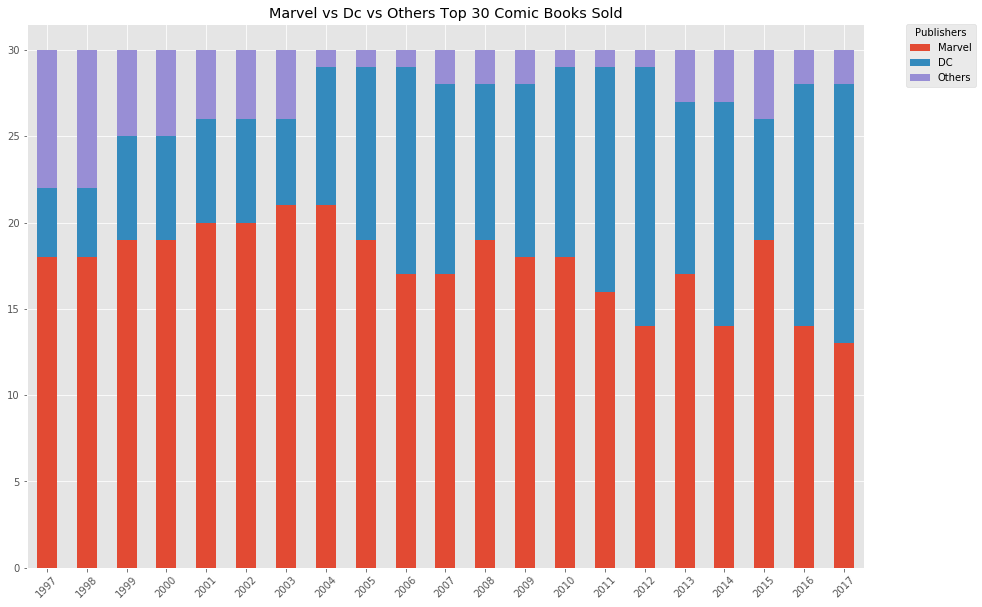

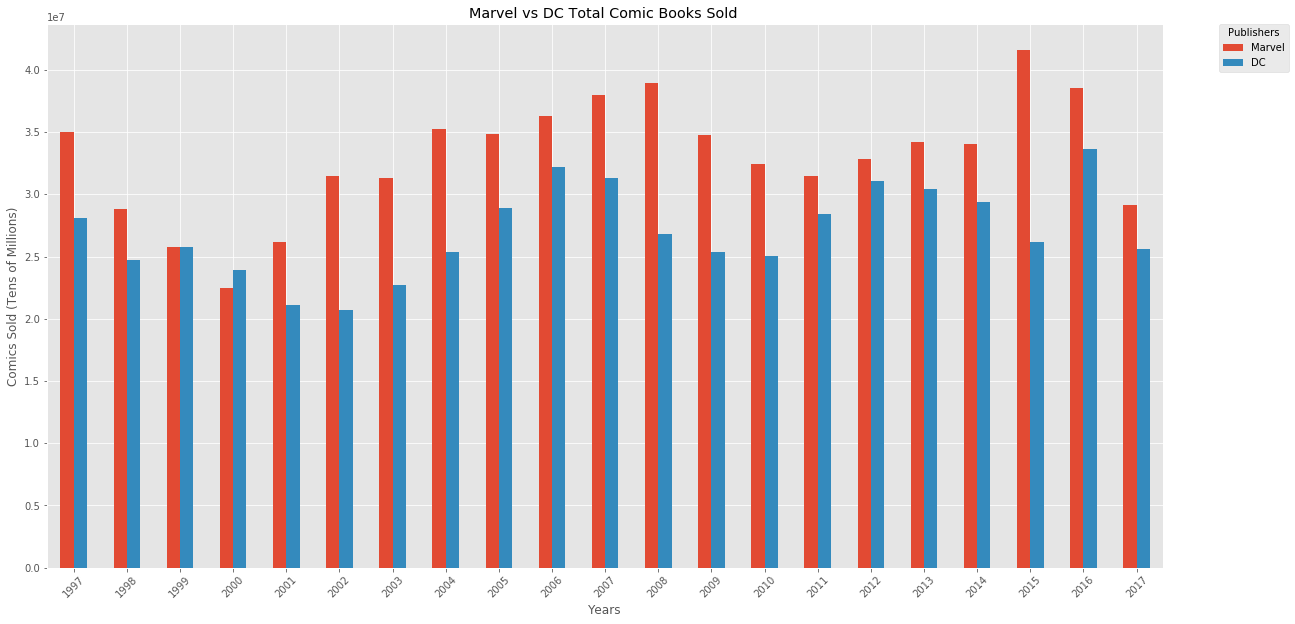

The difference in sample means is significant for Marvel.
The difference in sample means is significant for DC.


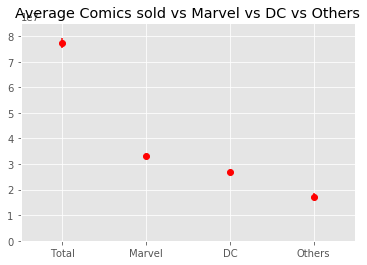

In [3]:
#import libraries
import pandas as pd
import glob
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import matplotlib.patches as mpatches
style.use('ggplot')
import scipy.stats as stats
from scipy.stats import linregress, sem, ttest_ind

# initialize list of years to process
yrs_to_process = [1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013,
                  2014, 2015, 2016, 2017]

# attributes /column names needed to plot charts
publishers_attributes = ["Marvel_Top_Thirty", "DC_Top_Thirty", 'Others_Top_Thirty', 'Marvel_Total_Sold',
                         'DC_Total_Sold', 'Others_Sold', 'Total_Sold', 'Total_Sales', 'Marvel_Total_Sales', 'DC_Total_Sales',
                         "Other_Total_Sales", 'Marvel_price_avg', 'DC_price_avg', 'Others_price_avg'
                         ]

# create publishers stats dataframe with years as the index and attributes as columns
publishers_stats_df = pd.DataFrame(
    index=yrs_to_process, columns=publishers_attributes)

# initialize all columns to zero
publishers_stats_df = publishers_stats_df.fillna(value=0)


# through all years initialized in dataframe
for index, row in publishers_stats_df.iterrows():
    # list to hold marvel monthly count for a year
    # reset marvel and DC monthly top 10 stats list when processing every year
    marvel_mntly_top_thirty = []
    dc_mntly_top_thirty = []

    # process each monthly json file for the year being processed
    for comichron_json in glob.glob("./source-data/" + str(index) + "-*.json"):
        if os.path.isfile(comichron_json):
            #print(f"Processing file {comichron_json}")
            # read json file
            monthly_df = pd.read_json(comichron_json)

            monthly_df["Year"] = index
            monthly_df["fileName"] = comichron_json

            # sum monthly count of comic books sold and add it to running total in publishers stats dataframe
            row['Total_Sold'] = row['Total_Sold'] + monthly_df["count"].sum()
            # sum monthly count of comic books for Marvel sold and add it to running total in publishers stats dataframe
            row['Marvel_Total_Sold'] += monthly_df[monthly_df["publisher"]
                                                   == 'Marvel']["count"].sum()
            # sum monthly count of comic books for DC sold and add it to running total in publishers stats dataframe
            row['DC_Total_Sold'] += monthly_df[monthly_df["publisher"]
                                               == 'DC']["count"].sum()

            # sort and get top thirty comics sold
            monthly_top_30 = monthly_df.sort_values(
                by="count", ascending=False).head(30)
            # count how many times marvel occur in top 30
            marvel_mntly_top_thirty.append(
                len(monthly_top_30[monthly_top_30["publisher"] == 'Marvel']))
            # count how many times DC occur in top 30
            dc_mntly_top_thirty.append(
                len(monthly_top_30[monthly_top_30["publisher"] == 'DC']))

            monthly_df["fprice"] = monthly_df["price"].str.replace("$", "")
            monthly_df["fprice"] = pd.to_numeric(monthly_df["fprice"])
            monthly_df["fcount"] = monthly_df["count"].astype(float)
            monthly_df["sales"] = monthly_df.fprice * monthly_df.fcount
            row['Total_Sales'] += monthly_df["sales"].sum()
            row['Marvel_Total_Sales'] += monthly_df[monthly_df["publisher"]
                                                    == 'Marvel']["sales"].sum()
            row['DC_Total_Sales'] += monthly_df[monthly_df["publisher"]
                                                == 'DC']["sales"].sum()

    # calculate average for the year
    row["Marvel_Top_Thirty"] = np.mean(marvel_mntly_top_thirty)
    row["DC_Top_Thirty"] = np.mean(dc_mntly_top_thirty)
    row["Others_Top_Thirty"] = 30 - \
        (row["Marvel_Top_Thirty"] + row["DC_Top_Thirty"])
    row["Others_Sold"] = row['Total_Sold'] - \
        (row["Marvel_Total_Sold"] + row["DC_Total_Sold"])
    row["Other_Total_Sales"] = row['Total_Sales'] - \
        (row["Marvel_Total_Sales"] + row["DC_Total_Sales"])
    row['Marvel_price_avg'] = (
        row['Marvel_Total_Sales']/row["Marvel_Total_Sold"])
    row['DC_price_avg'] = row['DC_Total_Sales']/row["DC_Total_Sold"]
    row['Others_price_avg'] = row["Other_Total_Sales"] / row["Others_Sold"]

    # name index to year ,reset index and display calculated stats
dfs = np.split(publishers_stats_df, [3], axis=1)
top_30_publishers_stats_df = dfs[0]
top_30_publishers_stats_df = top_30_publishers_stats_df.reset_index()
top_30_publishers_stats_df = top_30_publishers_stats_df.rename(columns={'index': 'Year',
                                                                        'Marvel_Top_Thirty': 'Marvel',
                                                                        'DC_Top_Thirty': 'DC',
                                                                        'Others_Top_Thirty': 'Others'})
total_sold_publishers_stats_df = dfs[1]
total_sold_publishers_stats_df = total_sold_publishers_stats_df.reset_index()
total_sold_publishers_stats_df = total_sold_publishers_stats_df.rename(columns={'index': 'Year',
                                                                                'Marvel_Total_Sold': 'Marvel',
                                                                                'DC_Total_Sold': 'DC',
                                                                                'Others_Sold': 'Others',
                                                                                'Total_Sold': 'Total'})
total_sold_publishers_stats_df
dfs = np.split(dfs[1], [4], axis=1)
total_sales_publishers_stats_df = dfs[1]
total_sales_publishers_stats_df = total_sales_publishers_stats_df.reset_index()
total_sales_publishers_stats_df = total_sales_publishers_stats_df.rename(columns={'index': 'Year',
                                                                                  'Total_Sales': 'Total',
                                                                                  'DC_Total_Sales': 'DC',
                                                                                  'Marvel_Total_Sales': 'Marvel',
                                                                                  'Other_Total_Sales': 'Others'})


ax = top_30_publishers_stats_df[["Marvel", "DC", "Others"]]\
    .plot(kind='bar', figsize=(15, 10), stacked=True,
          title="Marvel vs Dc vs Others Top 30 Comic Books Sold")
ax.set_xticklabels(yrs_to_process, rotation=45)
ax.legend(bbox_to_anchor=(1.05, 1), loc=2,
          borderaxespad=0., title="Publishers")
plt.show()


ax = total_sold_publishers_stats_df[["Marvel", "DC"]].plot(
    kind='bar', figsize=(20, 10))
ax.set_xticklabels(yrs_to_process, rotation=45)
ax.legend(bbox_to_anchor=(1.05, 1), loc=2,
          borderaxespad=0., title="Publishers")
# Set x and y limits
# plt.xlim(-0.25, len(x_axis))
# plt.ylim(0, max(rain_df["Inches"])+10)
plt.title("Marvel vs DC Total Comic Books Sold ")
plt.xlabel("Years")
plt.ylabel("Comics Sold (Tens of Millions)")
plt.show()


(t_stat_marvel, p_marvel) = ttest_ind(total_sold_publishers_stats_df["Total"],
                                      total_sold_publishers_stats_df["Marvel"], equal_var=False)
(t_stat_dc, p_dc) = ttest_ind(total_sold_publishers_stats_df["Total"],
                              total_sold_publishers_stats_df["DC"], equal_var=False)
(t_stat_others, p_others) = ttest_ind(total_sold_publishers_stats_df["Total"],
                                      total_sold_publishers_stats_df["Others"], equal_var=False)

if p_marvel < 0.05:
    print("The difference in sample means is significant for Marvel.")
else:
    print("The difference in sample means is not significant for Marvel.")

if p_dc < 0.05:
    print("The difference in sample means is significant for DC.")
else:
    print("The difference in sample means is not significant for Marvel.")

tick_labels = ["Total", "Marvel", "DC", "Others"]
means = [total_sold_publishers_stats_df["Total"].mean(), total_sold_publishers_stats_df["Marvel"].mean(),
         total_sold_publishers_stats_df["DC"].mean(), total_sold_publishers_stats_df["Others"].mean()]
x_axis = np.arange(0, len(means), 1)


sem = [sem(total_sold_publishers_stats_df["Total"]),
       sem(total_sold_publishers_stats_df["Marvel"]),
       sem(total_sold_publishers_stats_df["DC"]),
       sem(total_sold_publishers_stats_df["Others"])]


plt.errorbar(x_axis, means, sem, fmt="o", color='red')
plt.title("Average Comics sold vs Marvel vs DC vs Others")
plt.xlim(-0.5, 3.5)
plt.ylim(0, 85000000)
plt.xticks(x_axis, tick_labels)
plt.figure(figsize=(20, 10))
plt.show()

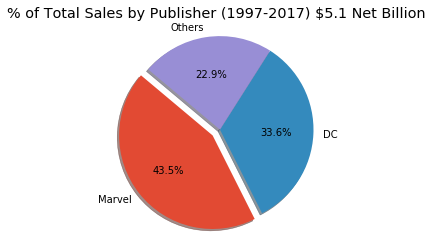

In [4]:
# Create Pie Chart
# Labels for the sections of our pie chart
labels = ["Marvel", "DC", "Others"]

# The values of each section of the pie chart
sizes = []
sizes.append(publishers_stats_df["Marvel_Total_Sales"].sum())
sizes.append(publishers_stats_df["DC_Total_Sales"].sum())
sizes.append(publishers_stats_df["Other_Total_Sales"].sum())


# The colors of each section of the pie chart
# colors = ["yellowgreen", "red", "lightcoral", "lightskyblue"]

explode = (0.1, 0, 0)
sizes

# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
plt.pie(sizes, explode=explode, labels=labels,
        autopct="%1.1f%%", shadow=True, startangle=140)

# Tells matplotlib that we want a pie chart with equal axes
plt.axis("equal")
plt.title("% of Total Sales by Publisher (1997-2017) $"
          + str(round(publishers_stats_df["Total_Sales"].sum()/1000000000, 1)) + " Net Billion")
plt.show()

The total comics sales prediction for Marvel in 2018 will be 159140750.67618942.
The total comics sales prediction for Marvel in 2019 will be 163906840.59047508.
The total comics sales prediction for Marvel in 2020 will be 168672930.50476074.
The total comics sales prediction for Marvel in 2021 will be 173439020.4190464.
The total comics sales prediction for Marvel in 2022 will be 178205110.33333206.
The total comics sales prediction for Marvel in 2023 will be 182971200.24761772.
The total comics sales prediction for Marvel in 2024 will be 187737290.16190338.
The total comics sales prediction for Marvel in 2025 will be 192503380.07618904.
The total comics sales prediction for Marvel in 2026 will be 197269469.9904747.
The total comics sales prediction for Marvel in 2027 will be 202035559.90476036.
The total comics sales prediction for Marvel in 2028 will be 206801649.81904602.
The total comics sales prediction for Marvel in 2029 will be 211567739.73333168.
The total comics sales predict

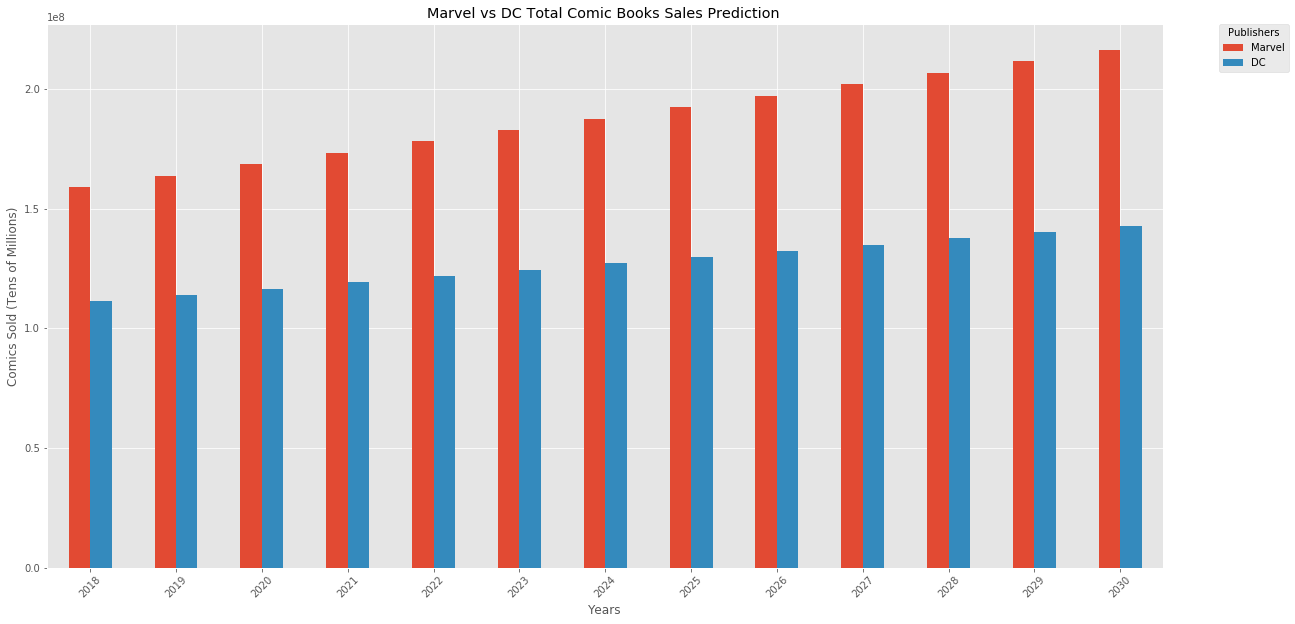

In [5]:
# Use regression to predict future sales

(total_sold_marvel_slope, total_sold_marvel_int, _, _, _) = linregress(total_sales_publishers_stats_df["Year"],
                                                                       total_sales_publishers_stats_df["Marvel"])
total_sold_marvel_fit = total_sold_marvel_slope * \
    total_sales_publishers_stats_df["Year"] + total_sold_marvel_int

# Year = 2022
yrs_to_predict = [2018, 2019, 2020, 2021, 2022,
                  2023, 2024, 2025, 2026, 2027, 2028, 2029, 2030]
marvel_sales_predict = []
for Year in yrs_to_predict:
    sales_predict = total_sold_marvel_slope * Year + total_sold_marvel_int
    print(
        f"The total comics sales prediction for Marvel in {Year} will be {sales_predict}.")
    marvel_sales_predict.append(sales_predict)

(dc_sales_slope, dc_sales_int, _, _, _) = linregress(
    total_sales_publishers_stats_df["Year"], total_sales_publishers_stats_df["DC"])
dc_sales_fit = dc_sales_slope * \
    total_sales_publishers_stats_df["Year"] + dc_sales_int

# Year = 2022
yrs_to_predict = [2018, 2019, 2020, 2021, 2022,
                  2023, 2024, 2025, 2026, 2027, 2028, 2029, 2030]
dc_sales_predict = []
for Year in yrs_to_predict:
    sales_predict = dc_sales_slope * Year + dc_sales_int
    print(
        f"The total comics sales prediction for DC in {Year} will be {sales_predict}.")
    dc_sales_predict.append(sales_predict)

sales_predictions_df = pd.DataFrame({
    "Year": yrs_to_predict,
    "Marvel": marvel_sales_predict,
    "DC": dc_sales_predict

})
sales_predictions_df

ax = sales_predictions_df[["Marvel", "DC"]].plot(kind='bar', figsize=(20, 10))
ax.set_xticklabels(yrs_to_predict, rotation=45)
ax.legend(bbox_to_anchor=(1.05, 1), loc=2,
          borderaxespad=0., title="Publishers")

plt.title("Marvel vs DC Total Comic Books Sales Prediction ")
plt.xlabel("Years")
plt.ylabel("Comics Sold (Tens of Millions)")
plt.show()

### Twitter Follower Analysis
###### Q: Who has more followers: Marvel or DC?

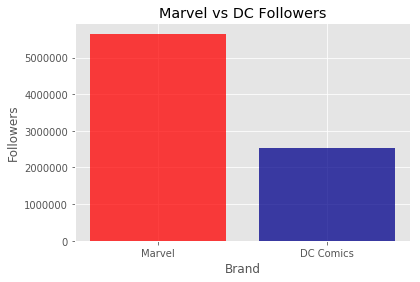

In [6]:
# Dependencies
import tweepy
import json
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from api_keys import twitter_consumer_key, twitter_consumer_key_secret, twitter_access_token, twitter_access_token_secret

from matplotlib import style
style.use('ggplot')

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(twitter_consumer_key, twitter_consumer_key_secret)
auth.set_access_token(twitter_access_token, twitter_access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

# Marvel
target_user_marvel = "Marvel"

# Get all tweets from home feed
public_tweets_marvel = api.user_timeline(target_user_marvel)


marvel_follower_count = public_tweets_marvel[0]["user"]["followers_count"]
# print(f"Follower Count: {marvel_follower_count}")

# Marvel
target_user_dc = "DCComics"

# Get all tweets from home feed
public_tweets_dc = api.user_timeline(target_user_dc)


dc_follower_count = public_tweets_dc[0]["user"]["followers_count"]
# print(f"Follower Count: {dc_follower_count}")


objects = ('Marvel', 'DC Comics')
y_pos = np.arange(len(objects))
performance = [marvel_follower_count, dc_follower_count]

plt.bar(y_pos, performance, align='center',
        alpha=.75, color=['red', 'darkblue'])
plt.xticks(y_pos, objects)
plt.ylabel('Followers')
plt.xlabel('Brand')
plt.title('Marvel vs DC Followers')

plt.show()

### Twitter Sentiment Analysis

##### Q: Which blockbuster currently has more positive sentiment? Marvel's Thor or DC's Justice League?

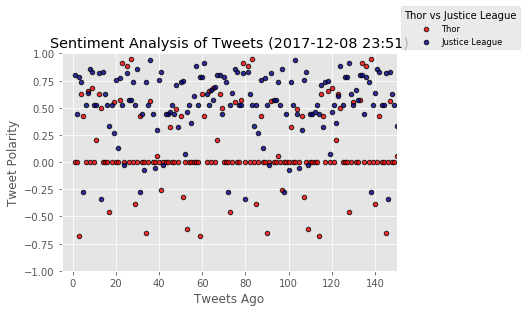

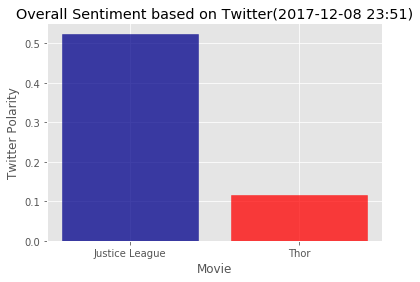

In [7]:
# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# target search term
target_terms = ("Thor", "Justice League")

# Counter
counter = 1

# "Real Person" Filters
min_tweets = 5
max_tweets = 100000
max_followers = 1000000000
max_following = 50000
lang = "en"

# Empty Dataframe
sentiments = pd.DataFrame(columns=["Movie Name", "Tweets Ago",
                                   "Tweet", "Compound", "Positive", "Negative", "Neutral", "Date"])

for target in target_terms:

    # set counter
    counter = 1

    # Loop through 3 times
    for x in range(3):

        # Run search around each tweet
        public_tweets = api.search(
            target, count=100, result_type="recent", max_id=None)

        # Loop through all tweets
        for tweet in public_tweets["statuses"]:

            # Use filters to check if user meets conditions
            if (tweet["user"]["followers_count"] < max_followers
                and tweet["user"]["statuses_count"] > min_tweets
                and tweet["user"]["statuses_count"] < max_tweets
                and tweet["user"]["friends_count"] < max_following
                    and tweet["user"]["lang"] == lang):

                # Run Vader Analysis on each tweet
                text = tweet["text"]
                results = analyzer.polarity_scores(text)
                compound = results["compound"]
                pos = results["pos"]
                neu = results["neu"]
                neg = results["neg"]
                tweets_ago = counter
                when = tweet["created_at"]

                # Add sentiments for each tweet into an array
                sentiments = sentiments.append({"Movie Name": target, "Tweets Ago": counter, "Tweet": text,
                                                "Compound": compound, "Positive": pos, "Negative": neg, "Neutral": neu, "Date": when}, ignore_index=True)

                # Add to counter
                counter = counter + 1


# Separate Sentiment analysis by movie
Thor = sentiments.loc[sentiments["Movie Name"] == "Thor"]
Just = sentiments.loc[sentiments["Movie Name"] == "Justice League"]

# Get x and y coordinates and average compound for each of the three city types
Thor_compound = Thor["Compound"]
Thor_count = Thor["Tweets Ago"]
Thor_avg_compound = Thor["Compound"].mean()

Just_compound = Just["Compound"]
Just_count = Just["Tweets Ago"]
Just_avg_compound = Just["Compound"].mean()

# Build the scatter plots for each movie
from datetime import datetime

plt.scatter(Thor_count,
            Thor_compound,
            s=20, c="red",
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Thor")

plt.scatter(Just_count,
            Just_compound,
            s=20, c="darkblue",
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Justice League")


# Incorporate the other graph properties
now = datetime.now()
now = now.strftime("%Y-%m-%d %H:%M")
plt.title("Sentiment Analysis of Tweets ({})".format(now))
plt.ylabel("Tweet Polarity")
plt.xlabel("Tweets Ago")
plt.xlim((-5, 150))
plt.ylim((-1, 1))
plt.grid(True)

# Create a legend
lgnd = plt.legend(fontsize="small", mode="Expanded",
                  numpoints=1, scatterpoints=1,
                  loc="best", title="Thor vs Justice League",
                  labelspacing=0.5, bbox_to_anchor=(1, 1))

# Show plot
plt.show()


# Build bar graph for average compound
movie_list = ["Thor", "Justice League"]
compound = [Thor_avg_compound, Just_avg_compound]

plt.title("Overall Sentiment based on Twitter({})".format(now))
plt.xlabel("Movie")
plt.ylabel("Twitter Polarity")

barlist = plt.bar(movie_list, compound, alpha=0.75, align="center")
barlist[0].set_color('red')
barlist[1].set_color('darkblue')

# Show plot
plt.show()